In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
sales = pd.read_csv("KAG_conversion_data.csv")
sales.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
sales.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
ad_id                  1143 non-null int64
xyz_campaign_id        1143 non-null int64
fb_campaign_id         1143 non-null int64
age                    1143 non-null object
gender                 1143 non-null object
interest               1143 non-null int64
Impressions            1143 non-null int64
Clicks                 1143 non-null int64
Spent                  1143 non-null float64
Total_Conversion       1143 non-null int64
Approved_Conversion    1143 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
sales.shape

(1143, 11)

# 1. Check missing values

In [6]:
sales.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

There is no missing values in this dataset

# 2. Data Understanding

1. categorical features, and their unique values
2. check outliers, and remove outliers
3. find the features correlation matrix

## Categorical Featuring: 

In [7]:
# number of Campaigns
print(f"{len(sales['xyz_campaign_id'].unique())} unique values: {sales['xyz_campaign_id'].unique()}")
print(f"{len(sales['fb_campaign_id'].unique())} unique values")

3 unique values: [ 916  936 1178]
691 unique values


There are only 3 campaigns from xyz company, and we should change xyz_coampaign_id to categorical features later.

In [8]:
# other categorical features
categorical_features = sales.select_dtypes(include="object")
for col in categorical_features:
    print(f"Column Name: {col} unique values: {sales[col].unique()}")
    print(sales[col].value_counts())

Column Name: age unique values: ['30-34' '35-39' '40-44' '45-49']
30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64
Column Name: gender unique values: ['M' 'F']
M    592
F    551
Name: gender, dtype: int64


In [9]:
# check number of unique values for all columns
for col_name in sales.columns:
    print(f"{col_name} has {len(sales[col_name].unique())} values")

ad_id has 1143 values
xyz_campaign_id has 3 values
fb_campaign_id has 691 values
age has 4 values
gender has 2 values
interest has 40 values
Impressions has 1130 values
Clicks has 183 values
Spent has 869 values
Total_Conversion has 32 values
Approved_Conversion has 16 values


In [10]:
# Categorical features are "ad_id", "xyz_campaign_id", "fb_campaign_id", "age", "gender", "interest"
categories = ["ad_id", "xyz_campaign_id", "fb_campaign_id", "age", "gender", "interest"]
sales[categories] = sales[categories].astype('category')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
ad_id                  1143 non-null category
xyz_campaign_id        1143 non-null category
fb_campaign_id         1143 non-null category
age                    1143 non-null category
gender                 1143 non-null category
interest               1143 non-null category
Impressions            1143 non-null int64
Clicks                 1143 non-null int64
Spent                  1143 non-null float64
Total_Conversion       1143 non-null int64
Approved_Conversion    1143 non-null int64
dtypes: category(6), float64(1), int64(4)
memory usage: 130.0 KB


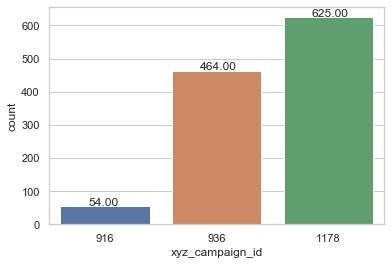

In [11]:
sns.set(style="whitegrid")
ax = sns.countplot(sales["xyz_campaign_id"])
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3))

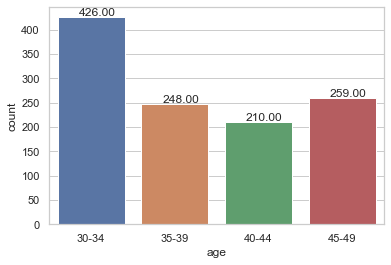

In [12]:
ax = sns.countplot(sales["age"])
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3))

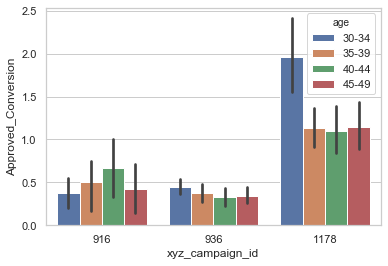

In [13]:
ax = sns.barplot(x = sales["xyz_campaign_id"], y = sales['Approved_Conversion'], hue = sales['age'])

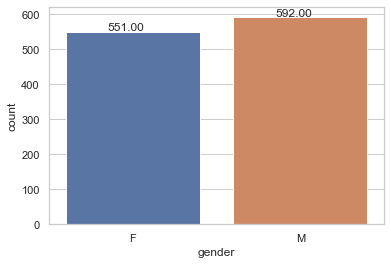

In [14]:
ax = sns.countplot(sales["gender"])
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3))

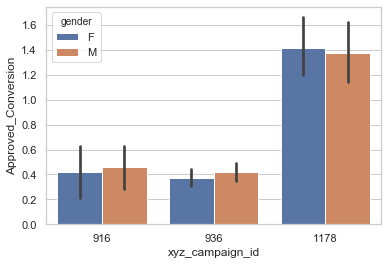

In [15]:
ax = sns.barplot(x = sales["xyz_campaign_id"], y = sales['Approved_Conversion'], hue = sales['gender'])

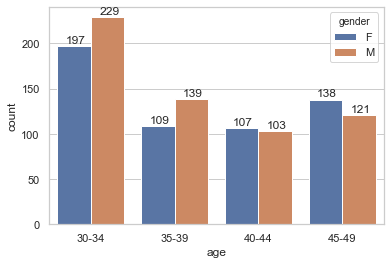

In [16]:
ax = sns.countplot(sales["age"],hue = sales['gender'] )
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+3))

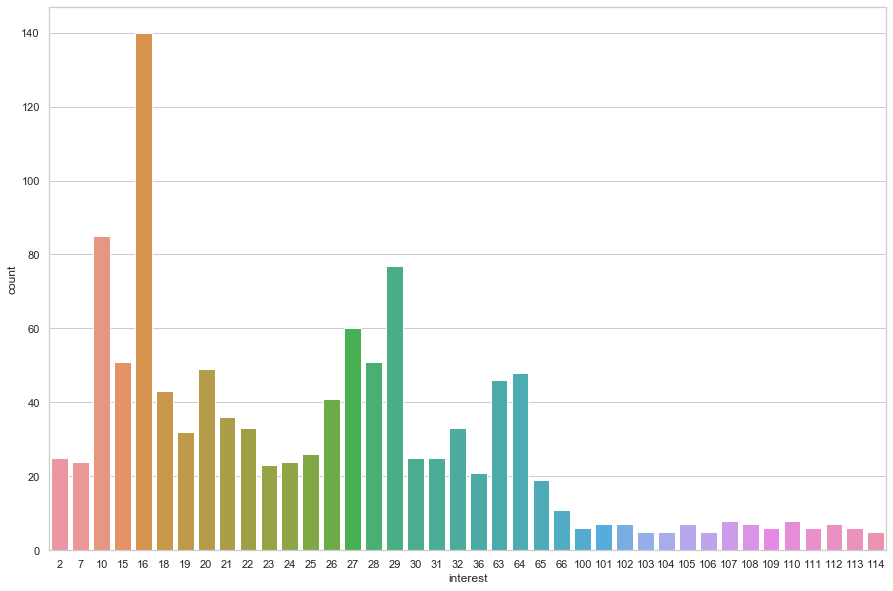

In [17]:
plt.figure(figsize = (15, 10))
sns.countplot(sales["interest"])

## Numerical features relationships 

Text(0.5, 0.98, 'Relationships between numerical features')

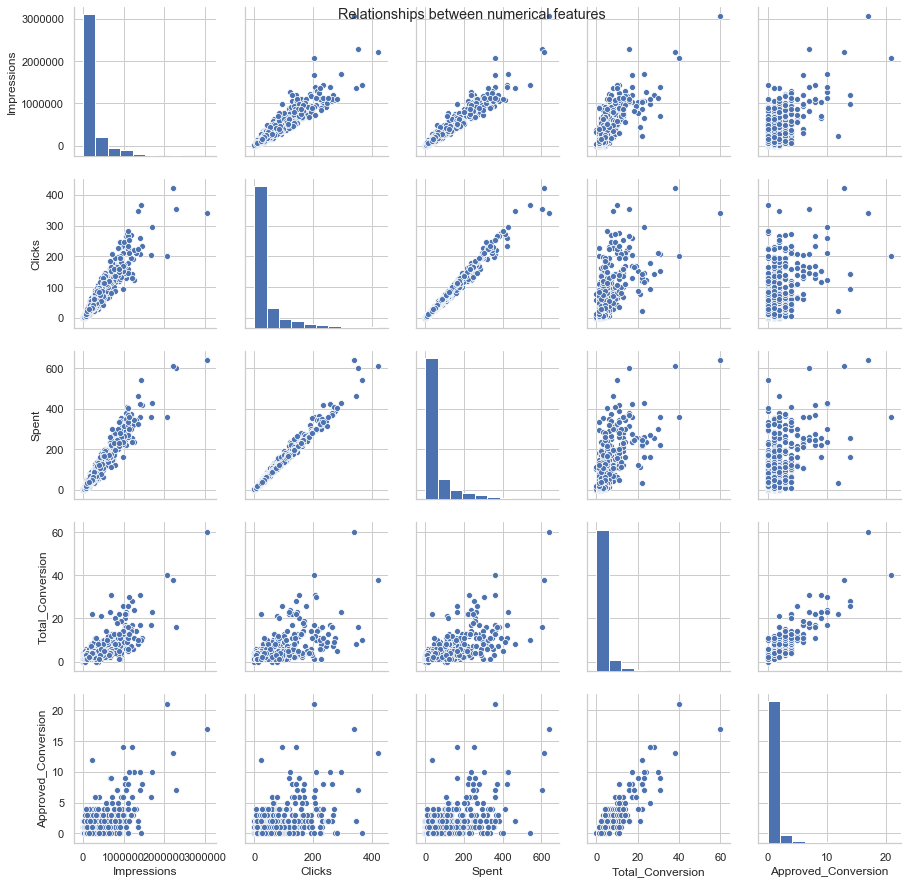

In [22]:
numerical_features = sales.iloc[:,3:].select_dtypes(include=["float64","int64" ])
sns.pairplot(numerical_features) #since first 3 are 
plt.suptitle("Relationships between numerical features")

## Check outliers 
1. since first 3 columns are id, we start checking outliers from column 3
2. check zscore: >3 or <-3 is considered to be an outlier

In [23]:
# First check skewness of each column, 
sales.iloc[:,3:].skew()

Impressions            3.010185
Clicks                 2.712187
Spent                  2.708867
Total_Conversion       5.095919
Approved_Conversion    4.837539
dtype: float64

when result is >0, towards the right hand side of distribution, and we will plot out the distribution

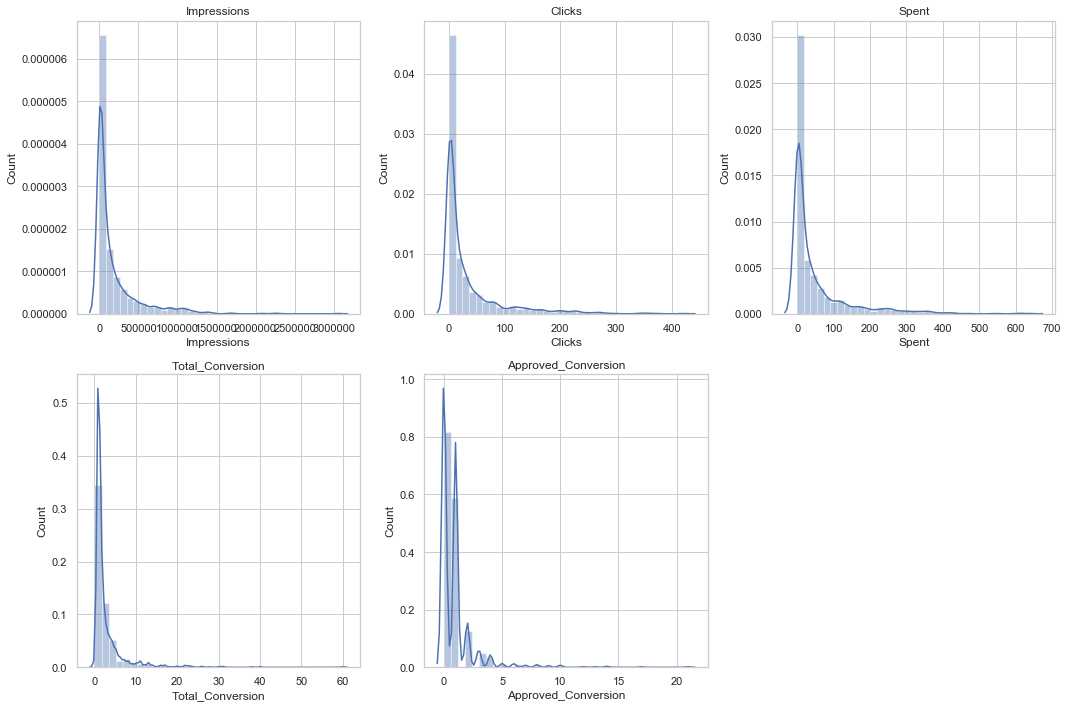

In [24]:
numerical_features = sales.iloc[:,3:].select_dtypes(include=["float64","int64" ])
plt.figure(figsize = (15, 10))
i = 1
for col in numerical_features:
    plt.subplot(2,3,i)
    sns.distplot(sales[col], hist=True, bins = 35)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    i+=1
    plt.tight_layout()

In [25]:
# Check number of outliers
for feature in numerical_features:
    val = np.where(np.abs(stats.zscore(sales[feature])>3))
    print(f"{feature} column has {len(val[0])} outliers")
    print(val[0])

Impressions column has 23 outliers
[ 518  524  525  528  574  628  662  706  760  765  768  807  860  865
  867  884  909  912  995 1026 1123 1127 1138]
Clicks column has 33 outliers
[ 525  574  662  706  760  765  807  860  865  867  884  903  909  929
  937  949  969  970  995 1002 1003 1009 1025 1026 1027 1032 1035 1041
 1118 1123 1127 1134 1138]
Spent column has 32 outliers
[ 525  528  574  662  706  760  765  768  807  812  860  865  867  884
  903  909  929  949  969  970  995 1002 1003 1025 1026 1027 1032 1041
 1118 1123 1134 1138]
Total_Conversion column has 26 outliers
[ 518  524  525  528  531  544  561  568  574  577  579  613  628  706
  806  807  827  859  860  867 1094 1097 1101 1115 1116 1127]
Approved_Conversion column has 22 outliers
[ 518  524  525  528  531  544  561  574  577  579  613  662  765  806
  807  860  867 1032 1101 1115 1116 1127]


We can remove outliers from the next step

## Check duplicate rows 

In [26]:
sales[sales.duplicated()]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion


###  Observation from the basic data understanding: 
1.	There 3 different campaigns that this company is using, and campaigns # 1178 has the most count, while campaign #916 has the least.
2.	We have 4 different age groups, and age 30-34 has the most count here. 
3.	Age group 40-44 has most engagement in campaign #916, while age group 30-34 has the most engagement in campaign #1178. Campaign # 936 has relative the same engagement among all 4 age groups, and 30-34 is relatively higher.
4.	Gender wise, more male than female in this dataset, and #916 & #936 male engagement is slightly higher than female group, while #1178 female has higher engagement.
5.	Gender vs. Age: for group 1 (30-34) and group 2 (35-39): more male; while group 3 (40-44) and group 4 (45-49): more female
6. the more you spent on ads, the more impression of the ads and clicks it will get. 

# 3. Data cleaning
1. categorical features
    - change xyz_campaign_id to categorical feature, and label it as 1,2,3
    - gender
    - age
2. outliers handling
3. features correlation matrix

In [27]:
# Categorical features
sales['age'] = sales['age'].replace(['30-34', '35-39','40-44','45-49'], [1,2,3,4])
sales['gender']=sales['gender'].replace(['M',"F"],[1,2])
sales['xyz_campaign_id']=sales['xyz_campaign_id'].replace([916,936,1178],[1,2,3])
sales.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,1,103916,1,1,15,7350,1,1.43,2,1
1,708749,1,103917,1,1,16,17861,2,1.82,2,0
2,708771,1,103920,1,1,20,693,0,0.00,1,0
3,708815,1,103928,1,1,28,4259,1,1.25,1,0
4,708818,1,103928,1,1,28,4133,1,1.29,1,1


In [29]:
# remove outliers with z_socre
def remove_outliers_z_score(dataframe, column, z = 3):
    dataframe["zscore"] = stats.zscore(dataframe[column])
    removed = dataframe[(dataframe["zscore"]<-z)|
                       (dataframe["zscore"]>z)].shape
    dataframe = dataframe[(dataframe["zscore"]>-z)&
                       (dataframe["zscore"]<z)]
    print(f"Removed: {removed[0]} outliers of {column}")
    return dataframe.drop(columns="zscore")

In [30]:
for feature in numerical_features:
    sales = remove_outliers_z_score(sales,feature)

Removed: 23 outliers of Impressions
Removed: 29 outliers of Clicks
Removed: 30 outliers of Spent
Removed: 22 outliers of Total_Conversion
Removed: 12 outliers of Approved_Conversion


In [31]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 0 to 1142
Data columns (total 11 columns):
ad_id                  1027 non-null category
xyz_campaign_id        1027 non-null int64
fb_campaign_id         1027 non-null category
age                    1027 non-null int64
gender                 1027 non-null int64
interest               1027 non-null category
Impressions            1027 non-null int64
Clicks                 1027 non-null int64
Spent                  1027 non-null float64
Total_Conversion       1027 non-null int64
Approved_Conversion    1027 non-null int64
dtypes: category(3), float64(1), int64(7)
memory usage: 153.1 KB


In [32]:
sales.skew()
# skewness level has dropped

ad_id                  0.045758
xyz_campaign_id       -0.535637
fb_campaign_id         0.625048
age                    0.322063
gender                 0.134873
interest               1.833865
Impressions            1.909354
Clicks                 2.153875
Spent                  1.986033
Total_Conversion       2.304436
Approved_Conversion    1.162428
dtype: float64

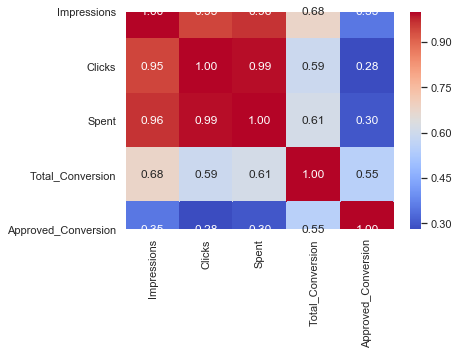

In [52]:
ax = sns.heatmap(sales[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),annot = True, fmt=".2f", cmap = "coolwarm")

From the correlation heatmap, we can tell that the impressions, clicks and spent are important features for approved conversion, now we will dig deeper by plotting the KPI

# 4. Plotting the KPIs

Our goal is to optimize sales conversion (Approved_Conversion) and predict future sales, first we need to understand some KPIs：
1.	Return on ad spend (ROAS): but we don't have the revenue data here
2.  Cost per conversion (CPA): is a great indicator of ROI, able to see which campaign is the most effective. For facebook ads CPA is defined as cost to Per New User Registration. CPA = Spent / approved_conversion
3.  Click Through Rate （CTR）= Clicks/Impressions
4.	Conversion rate （CvR） = Approved_conversion / Clicks
5.	Cost per click（CPC） = Spent / Clicks

### 1. CPA

[6.238, 15.811, 69.716]


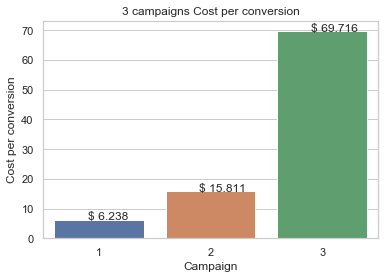

In [62]:
ads1 = sales[sales['xyz_campaign_id']==1]
ads2 = sales[sales['xyz_campaign_id']==2]
ads3 = sales[sales['xyz_campaign_id']==3]
cc_1 = round(((ads1['Spent'].sum()/ads1['Approved_Conversion'].sum())),3)
cc_2 = round(((ads2['Spent'].sum()/ads2['Approved_Conversion'].sum())),3)
cc_3 = round(((ads3['Spent'].sum()/ads3['Approved_Conversion'].sum())),3)
cc_total = [cc_1, cc_2, cc_3]
x = [1, 2, 3]
print(cc_total)
plt.xlabel('Campaign')
plt.ylabel("Cost per conversion")
plt.title("3 campaigns Cost per conversion")
ax_cc = sns.barplot(x = x, y = cc_total)
# display horizon bar chart with value label
for p in ax_cc.patches:
    ax_cc.annotate('$ {:.3f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))

### 2. CTR 

[0.023, 0.024, 0.017]


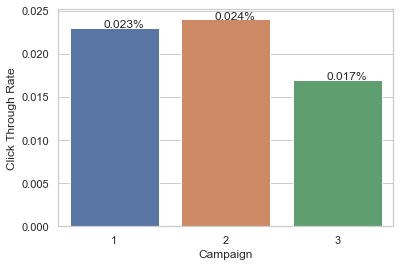

In [56]:
ctr_1 = round(((ads1['Clicks'].sum()/ads1['Impressions'].sum())*100),3)
ctr_2 = round(((ads2['Clicks'].sum()/ads2['Impressions'].sum())*100),3)
ctr_3 = round(((ads3['Clicks'].sum()/ads3['Impressions'].sum())*100),3)
ctr_total = [ctr_1, ctr_2, ctr_3]
print(ctr_total)
plt.xlabel('Campaign')
plt.ylabel("Click Through Rate")
ax_ctr = sns.barplot(x = x, y = ctr_total)
for p in ax_ctr.patches:
    ax_ctr.annotate('{:.3f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))

### 3. CvR (Conversion Rate)

[21.239, 9.224, 2.224]


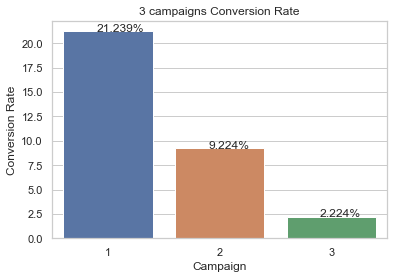

In [57]:
con_1 = round(((ads1['Approved_Conversion'].sum()/ads1['Clicks'].sum())*100),3)
con_2 = round(((ads2['Approved_Conversion'].sum()/ads2['Clicks'].sum())*100),3)
con_3 = round(((ads3['Approved_Conversion'].sum()/ads3['Clicks'].sum())*100),3)
con_total = [con_1, con_2, con_3]
print(con_total)
plt.xlabel('Campaign')
plt.ylabel("Conversion Rate")
plt.title("3 campaigns Conversion Rate")
ax_cr = sns.barplot(x = x, y = con_total)
# display horizon bar chart with value label
for p in ax_cr.patches:
    ax_cr.annotate('{:.3f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))

### 4. CPC 

[1.325, 1.458, 1.55]


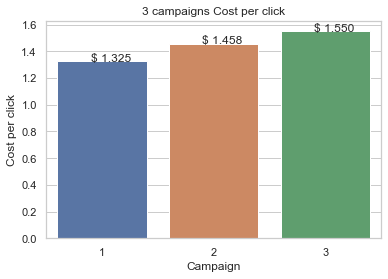

In [63]:
cpc_1 = round(((ads1['Spent'].sum()/ads1['Clicks'].sum())),3)
cpc_2 = round(((ads2['Spent'].sum()/ads2['Clicks'].sum())),3)
cpc_3 = round(((ads3['Spent'].sum()/ads3['Clicks'].sum())),3)
cpc_total = [cpc_1, cpc_2, cpc_3]
print(cpc_total)
plt.xlabel('Campaign')
plt.ylabel("Cost per click")
plt.title("3 campaigns Cost per click")
ax_cpc = sns.barplot(x = x, y = cpc_total)
# display horizon bar chart with value label
for p in ax_cpc.patches:
    ax_cpc.annotate('$ {:.3f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))

### Observations from KPIs
1. Campaign 1 has the lowest cost per conversion and cost per click, and the second highest click through rate, with the highest conversion rate. In sum, campaign 1 is the most efficient campaign with lowest cost.
2.	Campaign 3 has the highest cost per conversion and cost per click, which has the highest cost, but the click through rate and conversion rate is the lowest. We need to check the campaign design to find out why users not likely to click the ads, and why the content is not motivating user to make the purchase. 
3.	Campaign 2 has the highest CTR, which means this campaign design is attracting user to click the ads, but the conversion rate is relatively low. We need to dig deeper and see after clicking the ads, what does it leads to? And why is not motivating user to make the purchase. 

# 5. Modeling

## Define x and y 

In [64]:
x = sales.drop(labels=["Approved_Conversion", "Total_Conversion"],axis = 1)
y = sales["Approved_Conversion"]

## Scaling 

In [66]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

## Splitting Data 

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

## Random Forest Regressor 

In [92]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 42)
rfr.fit(X_train, y_train)
y_predict = rfr.predict(X_test)
y_predict = np.round(y_predict) # user conversion should be integer
print(y_predict[:15])
print(list(y_test[:15]))

[0. 1. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 2. 0.]
[0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1]


In [86]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test, y_predict)
mse=mean_squared_error(y_test, y_predict)
rmse=np.sqrt(mse)
r2_score=r2_score(y_test, y_predict)

In [87]:
mae,r2_score

(0.5836575875486382, -0.36802496328928025)

## Hyperparameter Optimization for RFR 

In [82]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [84]:
rf = RandomForestRegressor()
rf_random = rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [88]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [95]:
import math
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = mean_squared_error(predictions,test_labels)
    rmse = math.sqrt(mse)
#     mape = 100 * np.mean(errors / test_labels)
    accuracy = 100*max(0,rmse)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [96]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

TypeError: mean_squared_error() missing 1 required positional argument: 'y_pred'

In [94]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.5774 degrees.
Accuracy = -inf%.
